IMPORTING THE NECESSARY LIBRARIES

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

READ THE DATASET.

In [30]:
data = pd.read_csv("heart.csv")
data.head(11)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# X - Y split

In [4]:
y = data["output"]
x_salt_data = data.drop(["output"] , axis = 1)
x_salt_data.head(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2


# Normalization

In [5]:
x = (x_salt_data - np.min(x_salt_data))/(np.max(x_salt_data)-np.min(x_salt_data))
x.head()

c:\Users\aruun\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\aruun\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [6]:
x.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


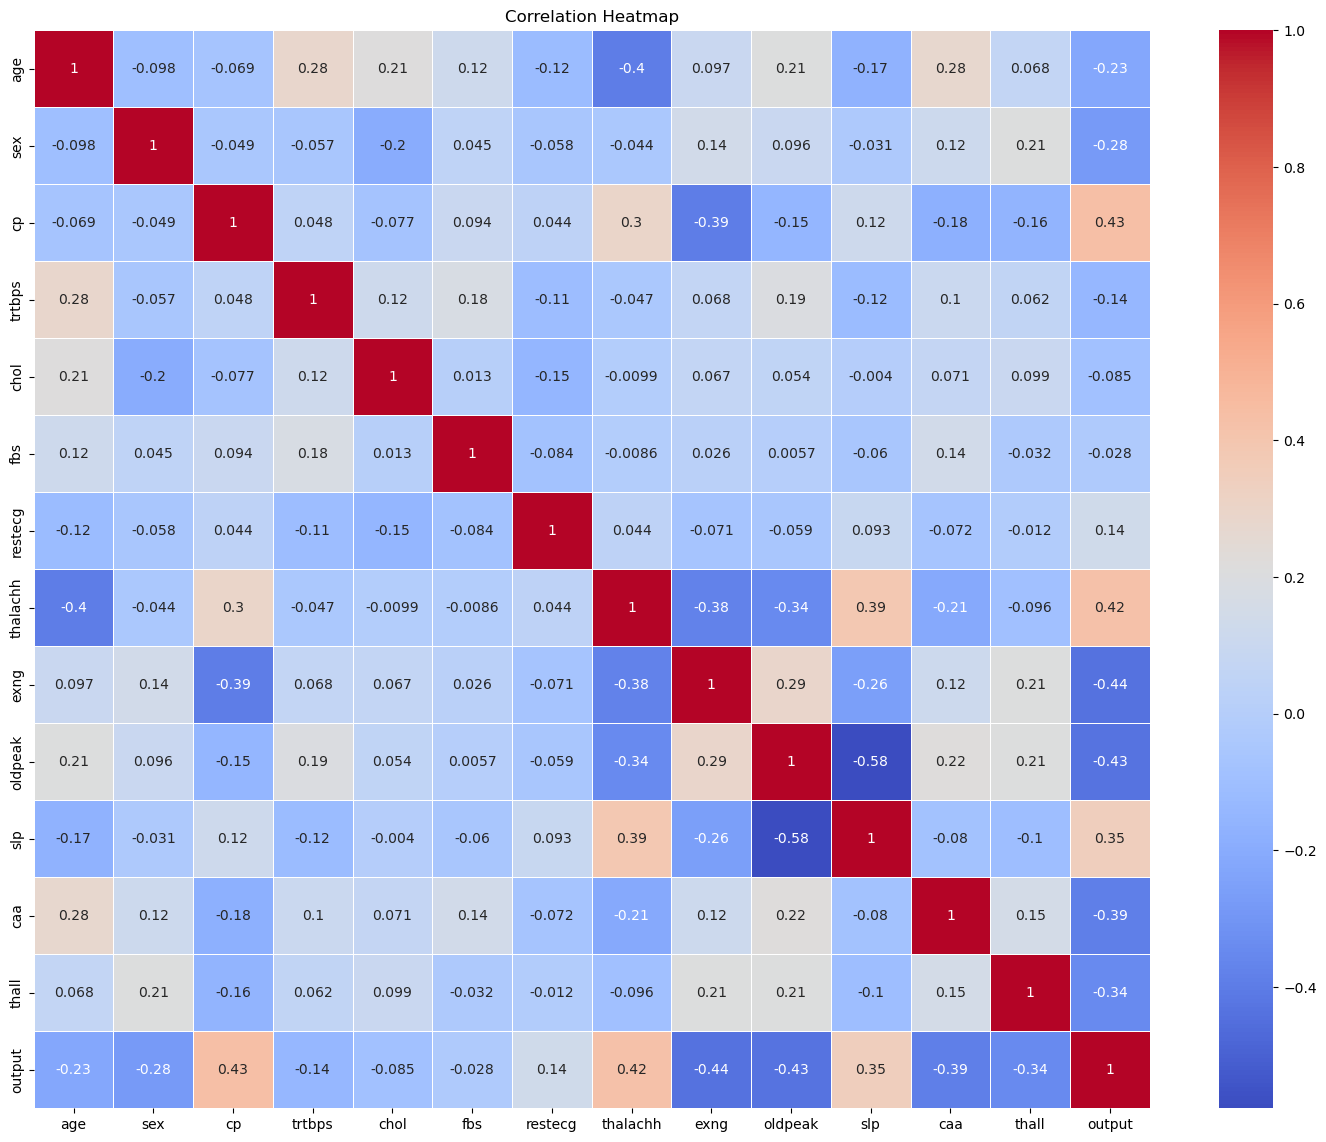

In [7]:
plt.figure(figsize=(18,14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

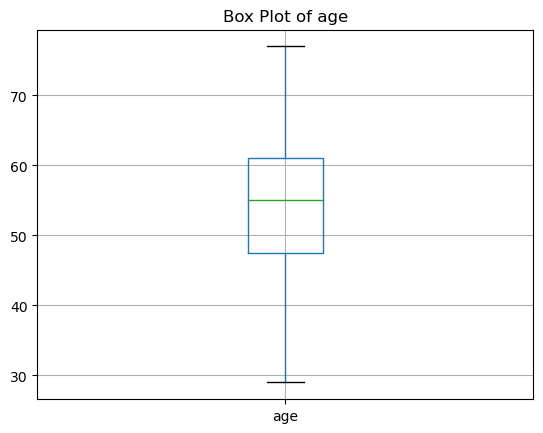

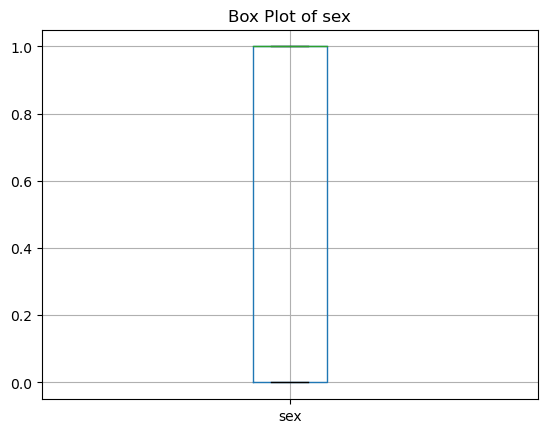

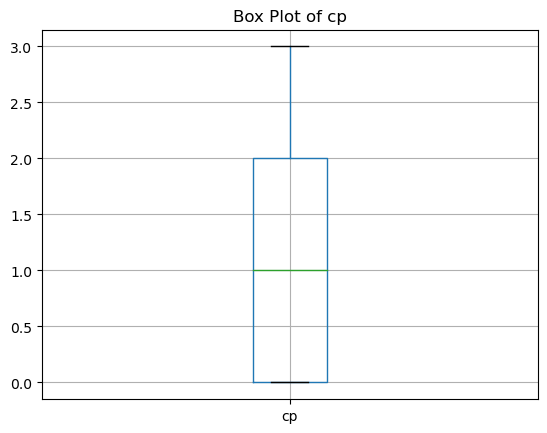

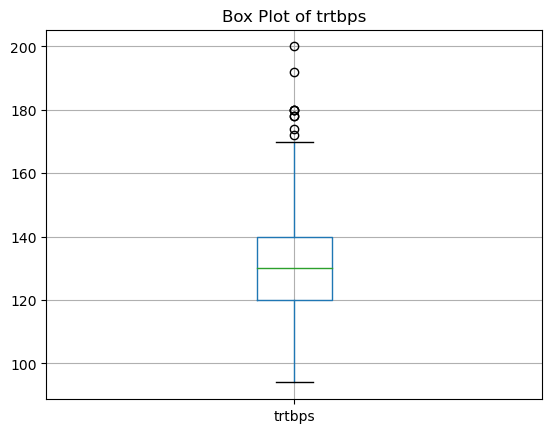

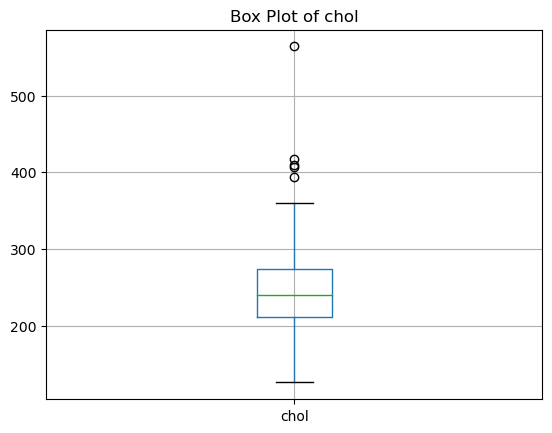

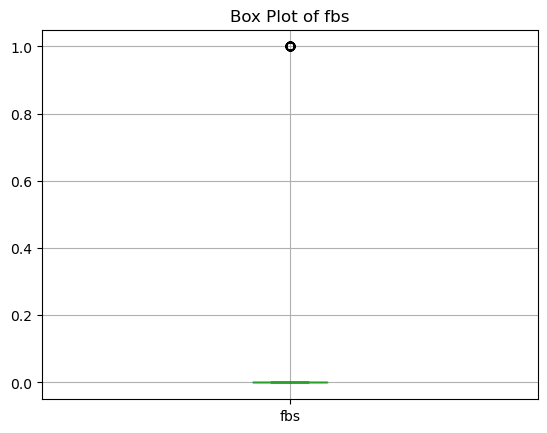

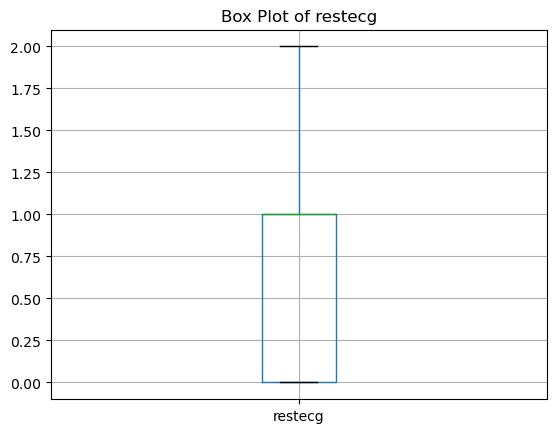

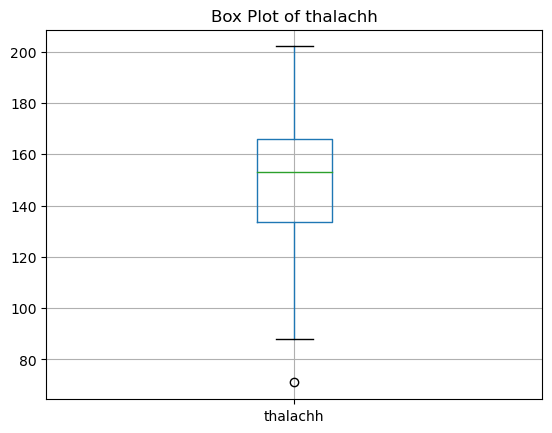

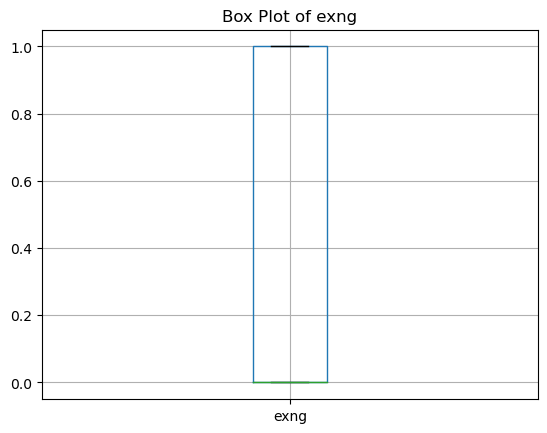

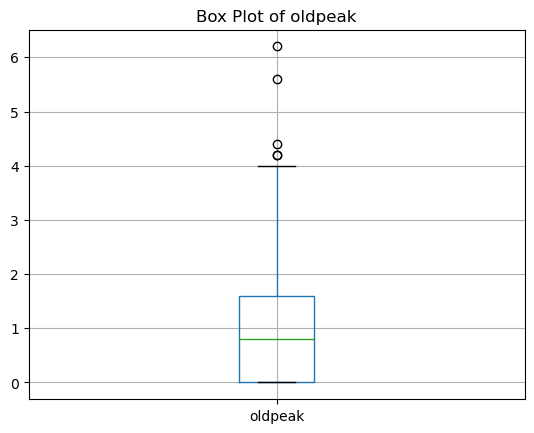

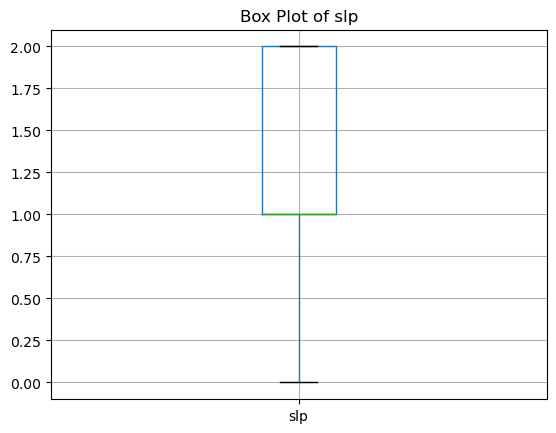

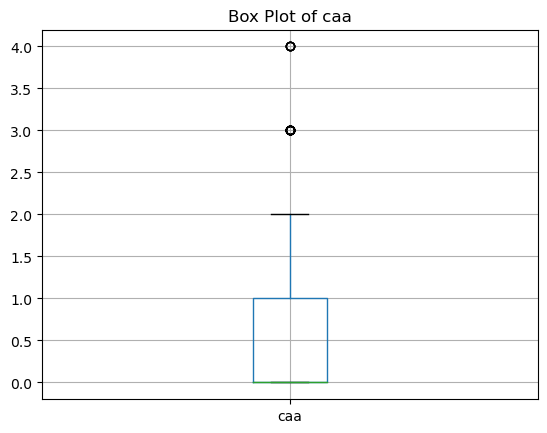

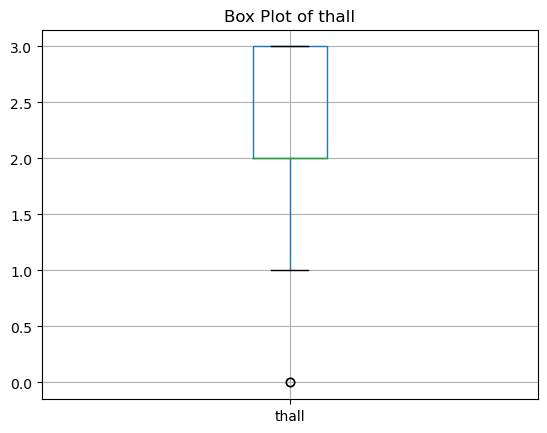

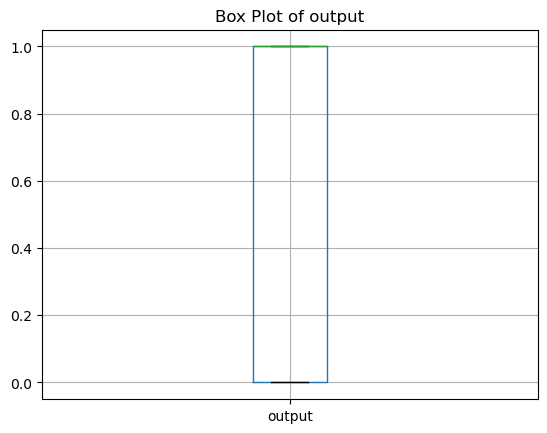

In [8]:
#Checking for outliers

numerical_columns = data.select_dtypes(include=['number'])

# Create box plots for each numerical column
for column in numerical_columns.columns:
    data.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.show()

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# Logistic Regression Classification

In [10]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train , y_train)

LogisticRegression()

In [11]:
print("Logistic Regression test accuracy :  ",model_lr.score(x_test , y_test))

Logistic Regression test accuracy :   0.7912087912087912


Text(33.22222222222222, 0.5, 'y_true (y_test)')

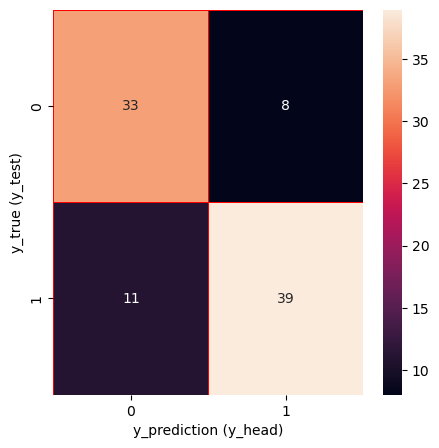

In [12]:
y_prediction = model_lr.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true , y_prediction)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidth = 0.5 , linecolor = "red" , fmt = ".0f", ax=ax)
plt.xlabel("y_prediction (y_head)")
plt.ylabel("y_true (y_test)")

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_knn.fit(x_train.values, y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
print("KNN test accuracy :  ",model_knn.score(x_test.values , y_test))

KNN test accuracy :   0.7582417582417582


c:\Users\aruun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


c:\Users\aruun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(33.22222222222222, 0.5, 'y_true (y_test)')

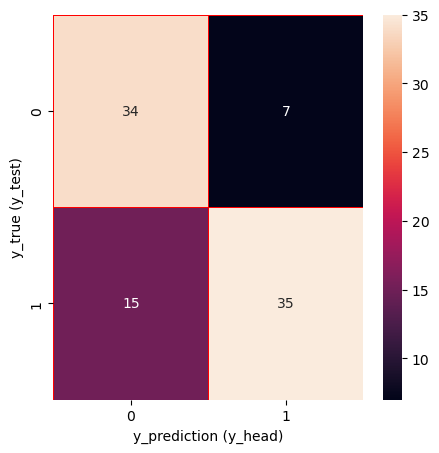

In [15]:
y_prediction = model_knn.predict(x_test.values)
y_true = y_test

cm = confusion_matrix(y_true , y_prediction)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidth = 0.5 , linecolor = "red" , fmt = ".0f", ax=ax)
plt.xlabel("y_prediction (y_head)")
plt.ylabel("y_true (y_test)")

# SVM

In [16]:
from sklearn.svm import SVC
model_svm = SVC(random_state = 42)
model_svm.fit(x_train , y_train)

SVC(random_state=42)

In [17]:
print("SVM test accuracy :  ",model_svm.score(x_test , y_test))

SVM test accuracy :   0.8021978021978022


Text(33.22222222222222, 0.5, 'y_true (y_test)')

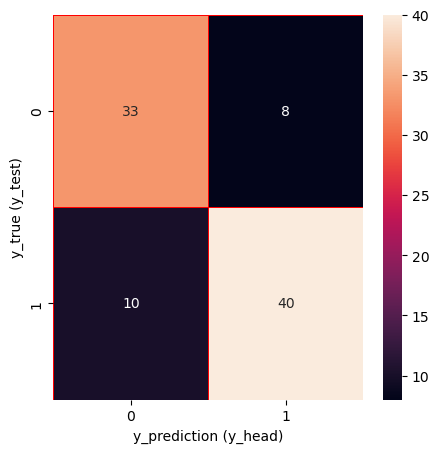

In [18]:
y_prediction = model_svm.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true , y_prediction)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidth = 0.5 , linecolor = "red" , fmt = ".0f", ax=ax)
plt.xlabel("y_prediction (y_head)")
plt.ylabel("y_true (y_test)")

# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train , y_train)

GaussianNB()

In [20]:
print("Naive Bayes test accuracy :  ",model_nb.score(x_test , y_test))

Naive Bayes test accuracy :   0.8351648351648352


Text(33.22222222222222, 0.5, 'y_true (y_test)')

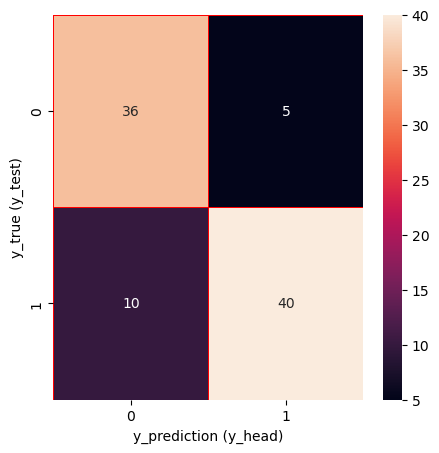

In [21]:
y_prediction = model_nb.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true , y_prediction)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidth = 0.5 , linecolor = "red" , fmt = ".0f", ax=ax)
plt.xlabel("y_prediction (y_head)")
plt.ylabel("y_true (y_test)")

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state = 42)
model_tree.fit(x_train , y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
print("Decision Tree test accuracy :  ",model_tree.score(x_test , y_test))

Decision Tree test accuracy :   0.7362637362637363


Text(33.22222222222222, 0.5, 'y_true (y_test)')

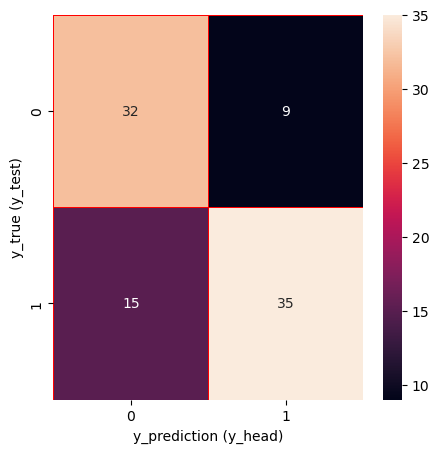

In [24]:
y_prediction = model_tree.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true , y_prediction)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidth = 0.5 , linecolor = "red" , fmt = ".0f", ax=ax)
plt.xlabel("y_prediction (y_head)")
plt.ylabel("y_true (y_test)")

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100 , random_state = 42)
model_RF.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [26]:
print("Random Forest test accuracy : ", model_RF.score(x_test , y_test))

Random Forest test accuracy :  0.8241758241758241


Text(33.22222222222222, 0.5, 'y_true (y_test)')

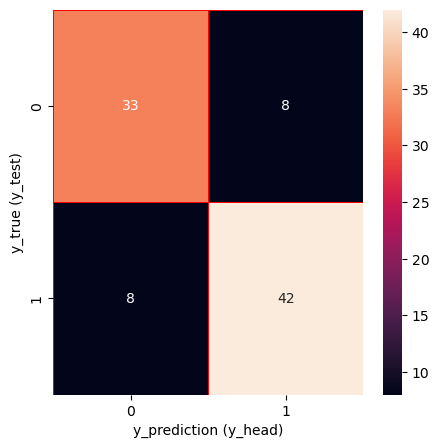

In [27]:
y_prediction = model_RF.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true , y_prediction)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidth = 0.5 , linecolor = "red" , fmt = ".0f", ax=ax)
plt.xlabel("y_prediction (y_head)")
plt.ylabel("y_true (y_test)")

# Final

In [28]:
print("Logistic Regression test accuracy-:  ",model_lr.score(x_test , y_test))
print("KNN test accuracy-----------------:  ",model_knn.score(x_test.values , y_test))
print("SVM test accuracy-----------------:  ",model_svm.score(x_test , y_test))
print("Naive Bayes test accuracy---------:  ",model_nb.score(x_test , y_test))
print("Decision Tree test accuracy-------:  ",model_tree.score(x_test , y_test))
print("Random Forest test accuracy-------: ",model_RF.score(x_test , y_test))

Logistic Regression test accuracy-:   0.7912087912087912
KNN test accuracy-----------------:   0.7582417582417582
SVM test accuracy-----------------:   0.8021978021978022
Naive Bayes test accuracy---------:   0.8351648351648352
Decision Tree test accuracy-------:   0.7362637362637363
Random Forest test accuracy-------:  0.8241758241758241


c:\Users\aruun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
